In [1]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt

In [2]:
pair = "EUR_USD"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")

In [3]:
df.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
3995,2023-11-14 06:00:00+00:00,12703,1.06956,1.07177,1.06942,1.07162,1.06948,1.07170,1.06934,1.07152,1.06964,1.07184,1.06951,1.07171
3996,2023-11-14 10:00:00+00:00,23573,1.07162,1.08003,1.07110,1.07895,1.07153,1.07996,1.07085,1.07888,1.07171,1.08011,1.07135,1.07902
3997,2023-11-14 14:00:00+00:00,33315,1.07892,1.08739,1.07889,1.08730,1.07885,1.08732,1.07882,1.08722,1.07899,1.08746,1.07896,1.08738
3998,2023-11-14 18:00:00+00:00,9359,1.08728,1.08876,1.08678,1.08791,1.08721,1.08869,1.08671,1.08783,1.08736,1.08884,1.08685,1.08799
3999,2023-11-14 22:00:00+00:00,6338,1.08786,1.08828,1.08656,1.08721,1.08772,1.08821,1.08648,1.08714,1.08799,1.08836,1.08664,1.08728


In [4]:
df['sTime'] = [dt.datetime.strftime(x, "s%y-%m-%d %H:%M") for x in df.time]

In [7]:
df_plot = df.iloc[:100]

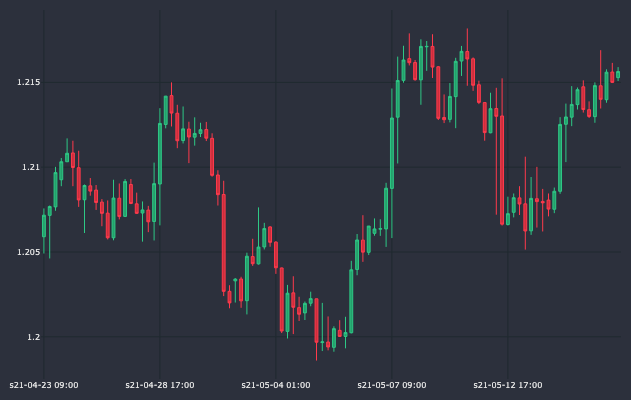

In [8]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x=df_plot.sTime,
    open=df_plot.mid_o,
    high=df_plot.mid_h,
    low=df_plot.mid_l,
    close=df_plot.mid_c,
    line=dict(width=1), opacity=1,
    increasing_fillcolor='#24A06B',
    decreasing_fillcolor="#CC2E3C",
    increasing_line_color='#2EC886',  
    decreasing_line_color='#FF3A4C'
))

fig.update_yaxes(
    gridcolor="#1f292f"
)
fig.update_xaxes(
    gridcolor="#1f292f",
    rangeslider=dict(visible=False),
    nticks=5
)

fig.update_layout(
    width=900,
    height=400,
    margin=dict(l=10,r=10,b=10,t=10),
    paper_bgcolor="#2c303c",
    plot_bgcolor="#2c303c",
    font=dict(size=8, color="#e1e1e1")
)

fig.show()